In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ORPOP.csv')

In [3]:
df.head()

,DATE,ORPOP
0,1/1/1900,415.0
1,1/1/1901,434.0
2,1/1/1902,454.0
3,1/1/1903,479.0
4,1/1/1904,504.0


In [4]:
df = df[df['DATE'] > '1/1/1950']

In [5]:
df.reset_index(inplace = True)

In [6]:
df

,index,DATE,ORPOP
0,51,1/1/1951,1556.000
1,52,1/1/1952,1582.000
2,53,1/1/1953,1601.000
3,54,1/1/1954,1626.000
4,55,1/1/1955,1659.000
5,56,1/1/1956,1698.000
6,57,1/1/1957,1712.000
7,58,1/1/1958,1718.000
8,59,1/1/1959,1746.000
9,60,1/1/1960,1772.000


In [7]:
df['index'] = df['index'].apply(lambda x: x-51)

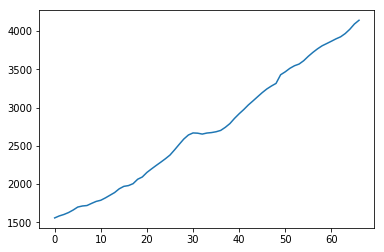

In [8]:
%matplotlib inline
plt.plot(df['ORPOP'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats

In [10]:
X = df[['index']]
y = df['ORPOP']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state =10)

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
pred = lm.predict(X_test)

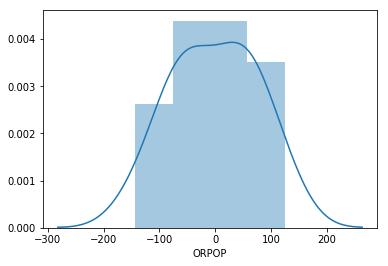

In [15]:
sns.distplot((y_test - pred))

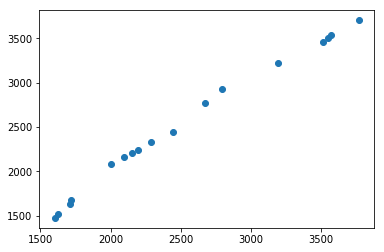

In [16]:
plt.scatter(y_test, pred)

In [17]:
df.tail()

,index,DATE,ORPOP
62,62,1/1/2013,3925.751
63,63,1/1/2014,3968.371
64,64,1/1/2015,4024.634
65,65,1/1/2016,4093.465
66,66,1/1/2017,4142.776


In [18]:
next4Qs = np.array(range(67,80)).reshape(-1,1)

In [19]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lm.predict(67)

array([4103.53971913])

In [21]:
future = lm.predict(next4Qs)

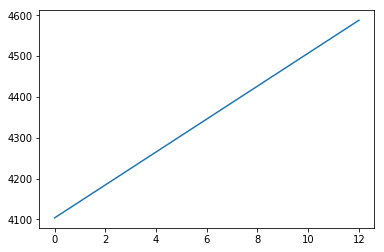

In [22]:
plt.plot(future)

In [23]:
from sklearn import metrics

In [24]:
mse = metrics.mean_squared_error(y_test, pred)

In [25]:
np.sqrt(mse)

74.40608762807285

In [26]:
r_square = metrics.r2_score(y_test, pred)

In [27]:
r_square

0.9894792849648782

In [28]:
future_pop = df['ORPOP']

In [29]:
df2 = future_pop.append(pd.Series(future)).reset_index()

In [30]:
df2.drop(columns = 'index', axis=1, inplace=True)

In [31]:
df2.tail()

,0
75,4426.408412
76,4466.766998
77,4507.125585
78,4547.484171
79,4587.842758


In [32]:
df2.columns = ['ORPOP']

In [33]:
(df2['ORPOP'][1] / df2['ORPOP'][0]) -1

0.016709511568123503

In [34]:
ser1 = []
ser1.append(0.0)
for i in range(0,79):
    revenue = df2['ORPOP'][i+1] / df2['ORPOP'][i] - 1
    ser1.append(revenue)

In [35]:
df2['change'] = ser1

In [36]:
df2.head()

,ORPOP,change
0,1556.0,0.000000
1,1582.0,0.016710
2,1601.0,0.012010
3,1626.0,0.015615
4,1659.0,0.020295


In [37]:
df2.tail()

,ORPOP,change
75,4426.408412,0.009202
76,4466.766998,0.009118
77,4507.125585,0.009035
78,4547.484171,0.008954
79,4587.842758,0.008875


In [38]:
# df2.to_csv('OrePOP_forecast.csv')

In [39]:
from statsmodels.formula.api  import ols

In [40]:
reg = ols(formula = 'y ~  X', data = df).fit()

In [41]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     7983.
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           9.56e-70
Time:                        18:47:48   Log-Likelihood:                -380.13
No. Observations:                  67   AIC:                             764.3
Df Residuals:                      65   BIC:                             768.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1399.5144     17.277     81.002      0.000    1365.009    1434.020
X             40.3586      0.452     89.347      0.000      39.456      41.261
==============================================================================
Omnibus:                        0.912   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.933
Skew:                          -0.134   Prob(JB):                        0.627
Kurtosis:                       2.488   Cond. No.                         75.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from sklearn.svm import SVR

In [46]:
svr_lin = SVR(kernel='linear')

In [47]:
pred_lin = svr_lin.fit(X_train,y_train).predict(X_test)

In [55]:
pred = svr_lin.fit(X,y).predict(X)

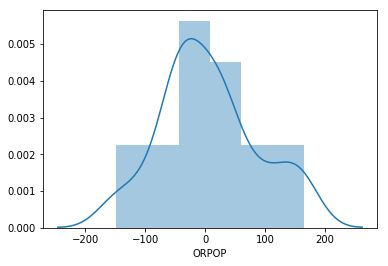

In [49]:
sns.distplot((y_test - pred_lin))

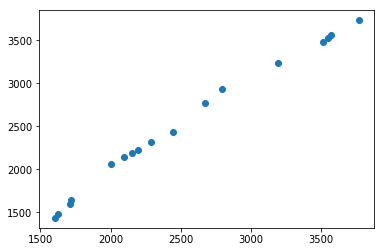

In [51]:
plt.scatter(y_test, pred_lin)

In [59]:
y

0     1556.000
1     1582.000
2     1601.000
3     1626.000
4     1659.000
5     1698.000
6     1712.000
7     1718.000
8     1746.000
9     1772.000
10    1787.000
11    1818.000
12    1853.000
13    1888.000
14    1937.000
15    1969.000
16    1979.000
17    2004.000
18    2062.000
19    2091.533
20    2151.022
21    2197.297
22    2241.932
23    2285.013
24    2329.661
25    2378.262
26    2446.673
27    2518.298
28    2588.012
29    2641.218
        ...   
37    2741.297
38    2790.575
39    2858.547
40    2918.745
41    2973.934
42    3034.490
43    3087.142
44    3141.421
45    3195.087
46    3243.254
47    3282.055
48    3316.154
49    3429.708
50    3467.937
51    3513.424
52    3547.376
53    3569.463
54    3613.202
55    3670.883
56    3722.417
57    3768.748
58    3808.600
59    3838.048
60    3868.031
61    3899.116
62    3925.751
63    3968.371
64    4024.634
65    4093.465
66    4142.776
Name: ORPOP, Length: 67, dtype: float64

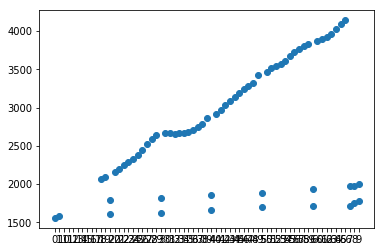

In [62]:
plt.scatter(X,y)

In [53]:
mse2 = metrics.mean_squared_error(y_test, pred_lin)
np.sqrt(mse2)

81.15406650103752

In [54]:
svr_lin.fit(X_train,y_train).predict(67)

array([4149.4733617])

In [ ]:
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [ ]:
svr_poly.fit(X_train, y_train).predict(X_test)